In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('The user has loaded the data file "{name}" with a length of {length} bits'.format(
      name=fn, length=len(uploaded[fn])))

Saving car.jpg to car.jpg
The user has loaded the data file "car.jpg" with a length of 4366662 bits


In [ ]:
# import libraries
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.signal as sig
from matplotlib import pylab
from pylab import *

In [ ]:
# align histogram
img = cv.imread('car.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) # stacking images side-by-side
cv.imwrite('car_aligned.jpg',equ)

True

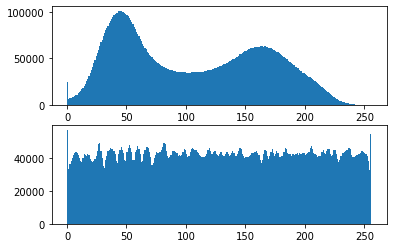

In [ ]:
# comparison of histograms - original and aligned
img = cv.imread('car.jpg',0)
img_aligned = cv.imread('car_aligned.jpg',0)
plt.subplot(211),plt.hist(img.ravel(),256,[0,256]);
plt.subplot(212),plt.hist(img_aligned.ravel(),256,[0,256]);

plt.show()

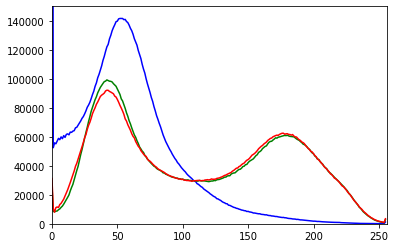

In [ ]:
# create a primary color card of the original image
img = cv.imread('car.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
     histr = cv.calcHist([img],[i],None,[256],[0,256])
     plt.plot(histr,color = col)
     plt.xlim([0,256])
     plt.ylim([0,150000])
plt.show()

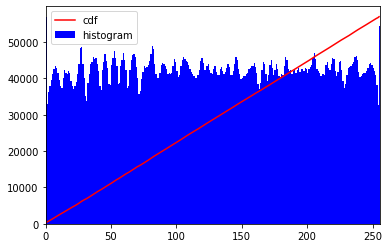

In [ ]:
#Cumulative Distribution Functions
img = cv.imread('car_aligned.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'r')
plt.hist(img.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

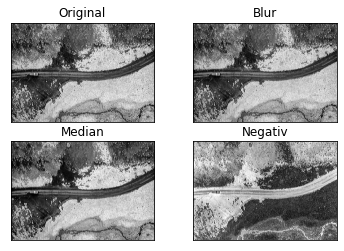

In [ ]:
# Gauss-Median-Negative filters
# original
img = cv.imread('car_aligned.jpg')
# gauss
blur = cv.GaussianBlur(img,(15,15),0)
# median
median = cv.medianBlur(img,15)
# negativ
negativ = cv.bitwise_not(img)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(blur,cmap = 'gray')
plt.title('Blur'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(median,cmap = 'gray')
plt.title('Median'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(negativ,cmap = 'gray')
plt.title('Negativ'), plt.xticks([]), plt.yticks([])

plt.show()

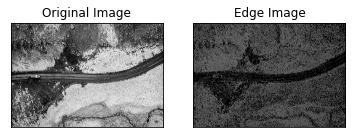

In [ ]:
#Canny Edge Detection
img = cv.imread('car_aligned.jpg',0)
edges = cv.Canny(img,200,300)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('The user has loaded the data file "{name}" with a length of {length} bits'.format(
      name=fn, length=len(uploaded[fn])))

Saving sudoku.png to sudoku.png
The user has loaded the data file "sudoku.png" with a length of 4338 bits


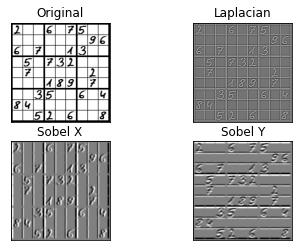

In [ ]:
#Image Gradients - Laplacian, Sobel X, Sobel Y
img = cv.imread('sudoku.png',0)

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


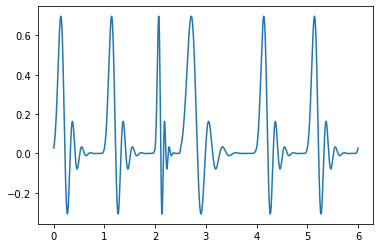

In [ ]:
# Sample ECG signal reading
rr = [1.0, 1.0, 0.5, 1.5, 1.0, 1.0] # rr time in seconds
fs = 8000.0 # sampling frequency
pqrst = sig.wavelets.daub(10) # signal simulation
ecg = scipy.concatenate([sig.resample(pqrst, int(r*fs)) for r in rr])
t = scipy.arange(len(ecg))/fs
pylab.plot(t, ecg)
pylab.show()